In [4]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
import pandas as pd

# Load the wine datasets (Both red and white)
red_path = r"C:/Users/DELL/OneDrive/Desktop/DESKTOP STUFF/Aptech/Python/Data Science/Wine Quality/winequality-red.csv"
white_path = r"C:/Users/DELL/OneDrive/Desktop/DESKTOP STUFF/Aptech/Python/Data Science/Wine Quality/winequality-white.csv"

if not os.path.exists(red_path):
	raise FileNotFoundError(f"Red wine dataset not found at: {red_path}\nPlease check the path and make sure the file exists.")
if not os.path.exists(white_path):
	raise FileNotFoundError(f"White wine dataset not found at: {white_path}\nPlease check the path and make sure the file exists.")

df_red = pd.read_csv(red_path, sep=';')
df_white = pd.read_csv(white_path, sep=';')

# Add a 'type' column to distinguish between red and white wines
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the datasets
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the first few rows of the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

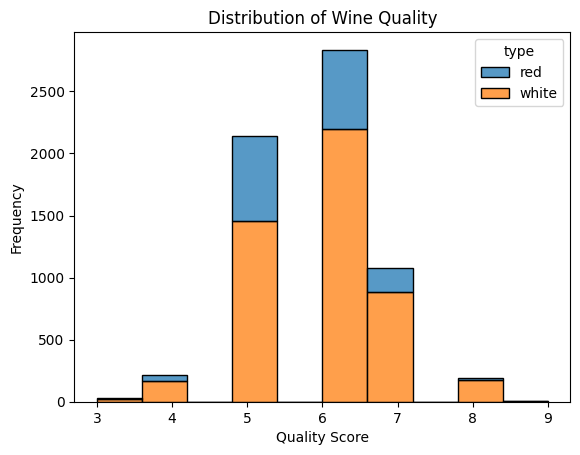

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure df is defined by running cell 1 before this cell.
sns.histplot(data=df, x="quality", hue="type", multiple="stack", bins=10) # pyright: ignore[reportUndefinedVariable]
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

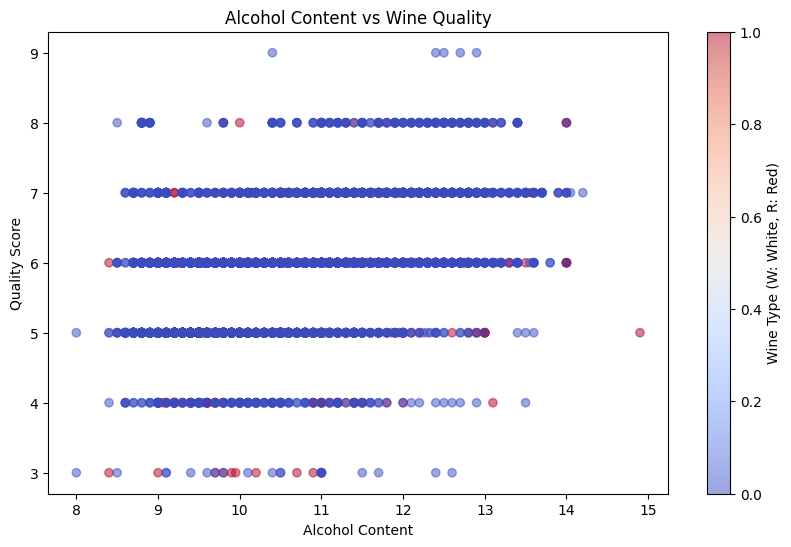

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot Diagram (Alcohol vs Quality)
plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'], df['quality'], alpha=0.5, c=(df['type'] == 'red').astype(int), cmap='coolwarm') # pyright: ignore[reportUndefinedVariable]
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Score')
plt.colorbar(label='Wine Type (W: White, R: Red)')
plt.show()


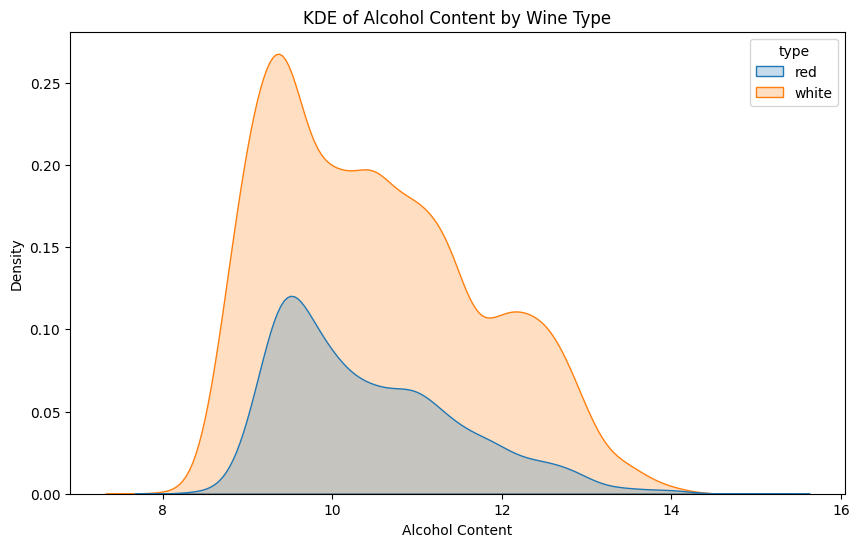

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency Distribution (KDE of Alcohol Content)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="alcohol", hue="type", fill=True) # pyright: ignore[reportUndefinedVariable]
plt.title('KDE of Alcohol Content by Wine Type')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

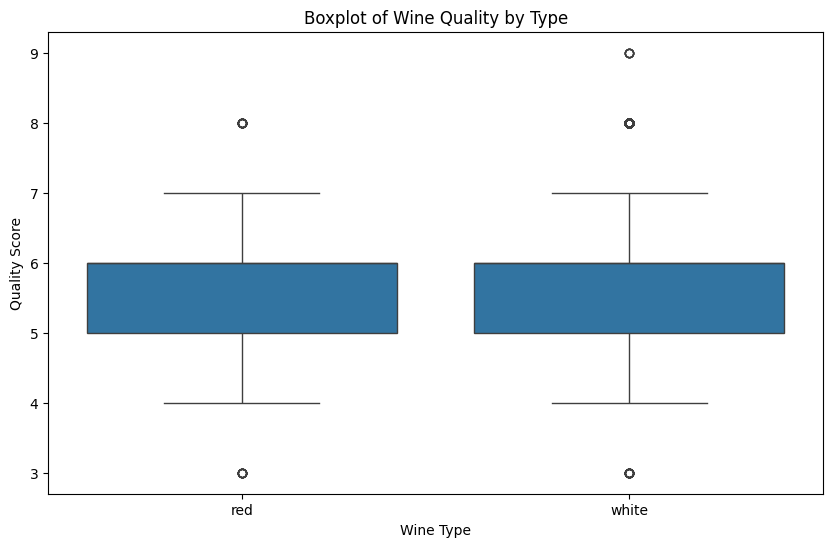

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot (Quality by Wine Type)
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='quality', data=df) # pyright: ignore[reportUndefinedVariable]
plt.title('Boxplot of Wine Quality by Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality Score')
plt.show()

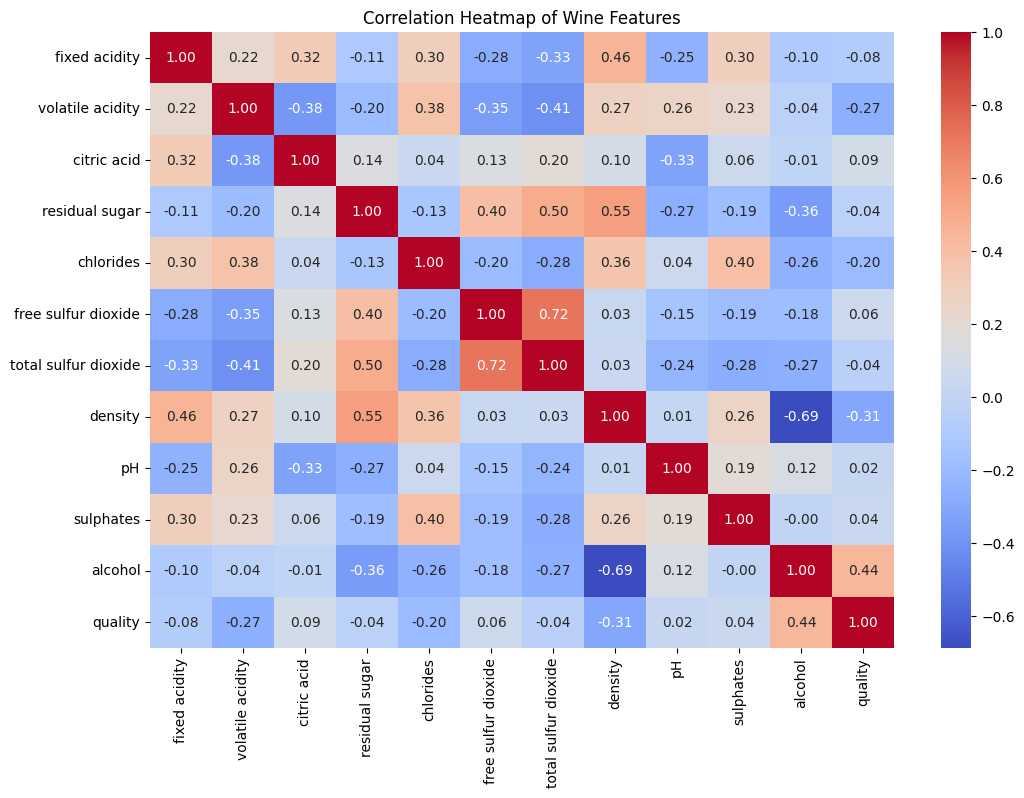

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.drop('type', axis=1).corr() # pyright: ignore[reportUndefinedVariable]
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Features')
plt.show()

<Figure size 1200x1000 with 0 Axes>

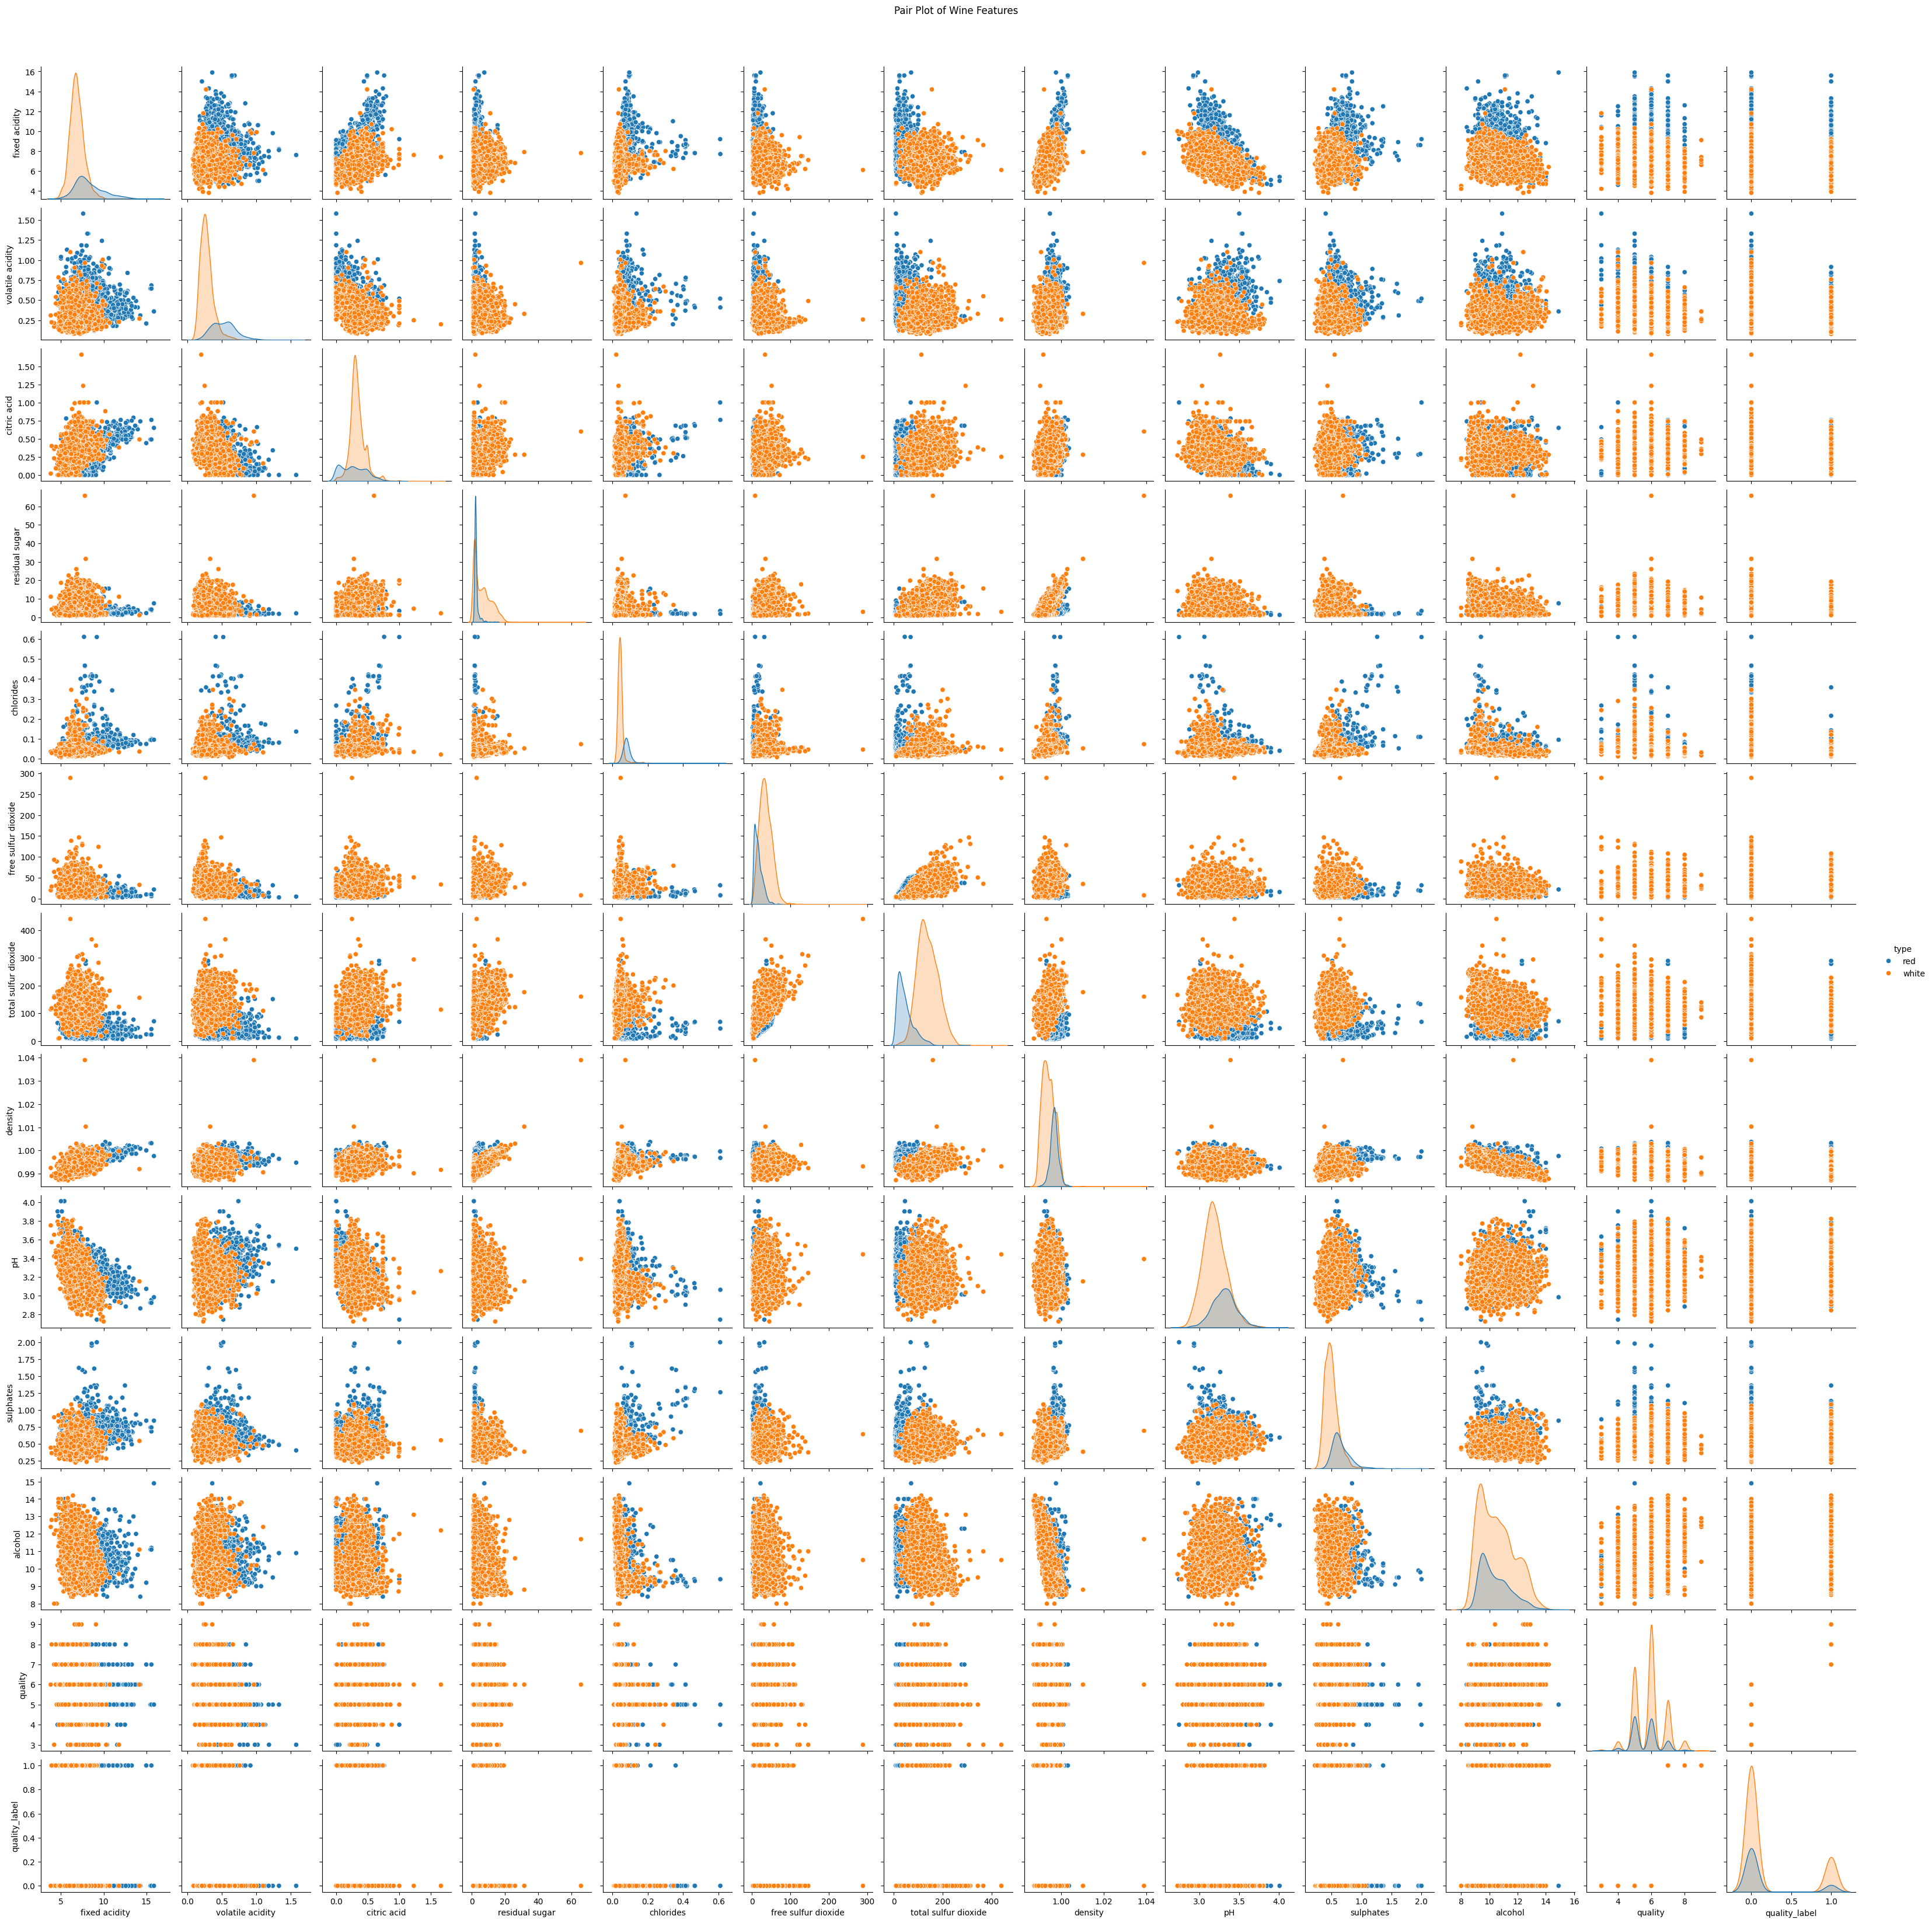

In [15]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Pair Plot to see relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df, hue='type', diag_kind='kde')
plt.suptitle('Pair Plot of Wine Features', y=1.02)
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Baseline Regression Model
# For this, Split into train/test; train Linear Regression or Random Forest; evaluate using RMSE, MAE, R².
X = df.drop(['quality', 'type'], axis=1) # pyright: ignore[reportUndefinedVariable]
y = df['quality'] # pyright: ignore[reportUndefinedVariable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.33120769230769226
Mean Squared Error: 0.21596099999999996
Root Mean Squared Error: 0.46471604233122826
R² Score: 0.7075865525131717


In [17]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Model (Quality as Good (>=7) vs Bad (<7))
# We need to train a classification model to predict if a wine is good or bad based on its features.
df['quality_label'] = (df['quality'] >= 7).astype(int) # pyright: ignore[reportUndefinedVariable]
X = df.drop(['quality', 'quality_label', 'type'], axis=1) # pyright: ignore[reportUndefinedVariable]
y = df['quality_label'] # pyright: ignore[reportUndefinedVariable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1048
           1       0.79      0.57      0.66       252

    accuracy                           0.89      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300

[[1009   39]
 [ 109  143]]
ROC AUC Score: 0.7651232885011511
